In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
data= pd.read_csv("USvideos.csv")

In [3]:
# Display the first few rows of the dataset
data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [4]:
data.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

In [5]:
# Summary Statistics
print(data.describe())

        category_id         views         likes      dislikes  comment_count
count  40949.000000  4.094900e+04  4.094900e+04  4.094900e+04   4.094900e+04
mean      19.972429  2.360785e+06  7.426670e+04  3.711401e+03   8.446804e+03
std        7.568327  7.394114e+06  2.288853e+05  2.902971e+04   3.743049e+04
min        1.000000  5.490000e+02  0.000000e+00  0.000000e+00   0.000000e+00
25%       17.000000  2.423290e+05  5.424000e+03  2.020000e+02   6.140000e+02
50%       24.000000  6.818610e+05  1.809100e+04  6.310000e+02   1.856000e+03
75%       25.000000  1.823157e+06  5.541700e+04  1.938000e+03   5.755000e+03
max       43.000000  2.252119e+08  5.613827e+06  1.674420e+06   1.361580e+06


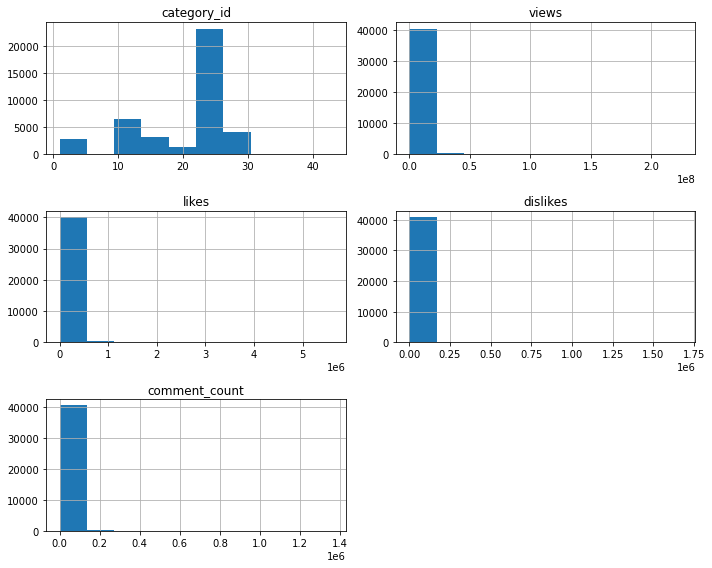

In [6]:
# Histograms for numerical variables
data.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

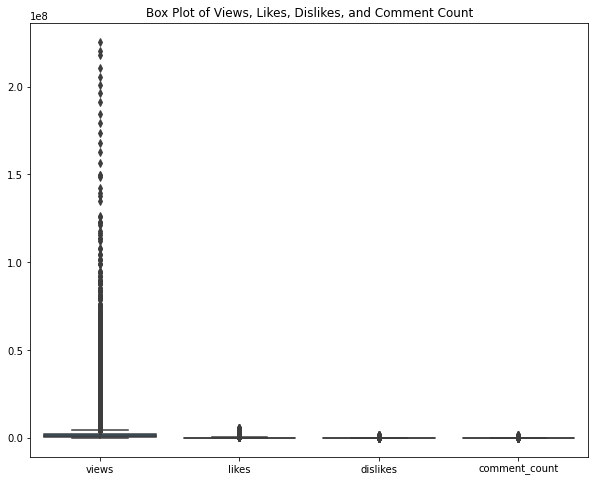

In [7]:
# Box plots for numerical variables
plt.figure(figsize=(10, 8))
sns.boxplot(data=data[['views', 'likes', 'dislikes', 'comment_count']])
plt.title('Box Plot of Views, Likes, Dislikes, and Comment Count')
plt.show()

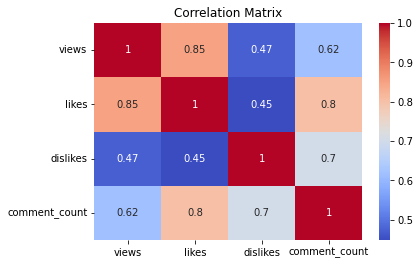

In [8]:
# Correlation Analysis
correlation_matrix = data[['views', 'likes', 'dislikes', 'comment_count']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

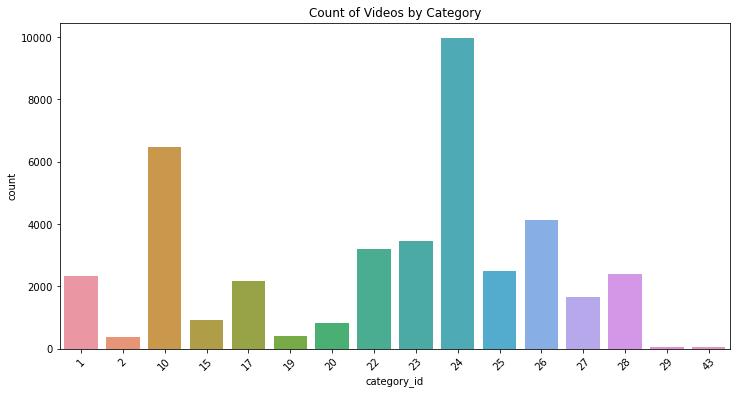

In [9]:
# Bar plot for categorical variables
plt.figure(figsize=(12, 6))
sns.countplot(x='category_id', data=data)
plt.title('Count of Videos by Category')
plt.xticks(rotation=45)
plt.show()

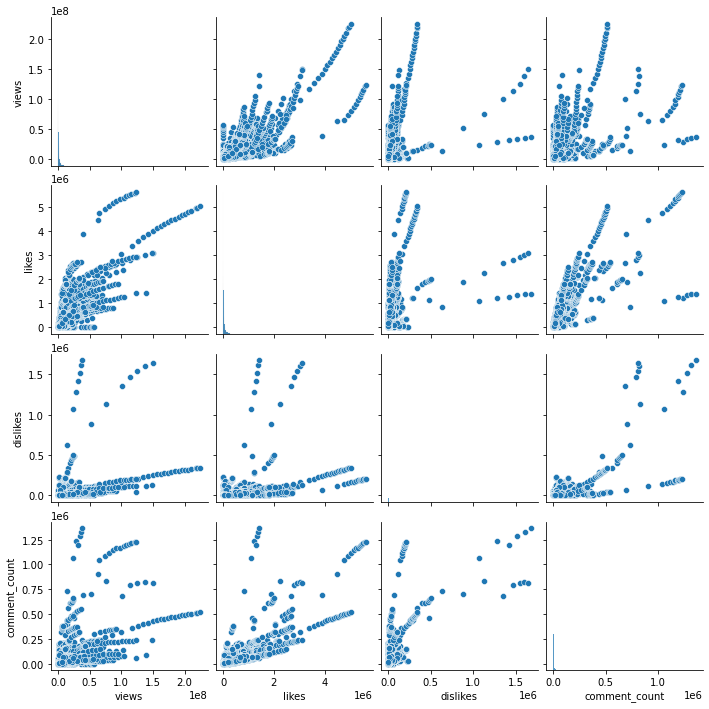

In [10]:
# Pairwise Relationships
sns.pairplot(data[['views', 'likes', 'dislikes', 'comment_count']])
plt.show()

In [17]:
# Calculate the first quartile (Q1) and third quartile (Q3) for the 'views' column
Q1 = data['views'].quantile(0.25)
Q3 = data['views'].quantile(0.75)

# Calculate the interquartile range (IQR) for the 'views' column
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers in the 'views' column
outliers = (data['views'] < lower_bound) | (data['views'] > upper_bound)

# Get the indices of outliers
outlier_indices = data[outliers].index

# Print the indices of outliers
print(outlier_indices)

Int64Index([   32,    53,    69,    70,   104,   149,   221,   238,   298,
              310,
            ...
            40935, 40937, 40938, 40939, 40940, 40941, 40942, 40943, 40947,
            40948],
           dtype='int64', length=4499)
